1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante regresión logística, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]]
- ¿Qué acierto tiene tu modelo? (score)
- Utiliza un conjunto de test con el 40% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Virginica" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras la regresión logística un buen algoritmo para estos datos? ¿por qué?

## First, import the necessary libraries

In [2]:
import pandas as pd 
import numpy as np

from sklearn import metrics, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt 
import seaborn as sns

### Load the dataset

In [21]:
iris_df = pd.read_csv(r'/Users/IAmLeoSanchez/Documents/Data_Science/The_Bridge/GIT_HUB_LEO/Data_Science_Bootcamp_Leo/data_science_nov_20_leo/week8/day5/data/iris.csv')
iris_df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
30,4.8,3.1,1.6,0.2,Setosa
95,5.7,3.0,4.2,1.2,Versicolor
67,5.8,2.7,4.1,1.0,Versicolor
25,5.0,3.0,1.6,0.2,Setosa
80,5.5,2.4,3.8,1.1,Versicolor


In [22]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Convert string labels into numbers for categorical modeling

In [23]:
le = preprocessing.LabelEncoder()
variety_encoded = le.fit_transform(iris_df['variety'])

# 0: Setosa, 1: Versicolor, 2: Virginica
print('Variety column encoded:\n', variety_encoded)

Variety column encoded:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
le.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

### Visualize the data using sns.pairplot

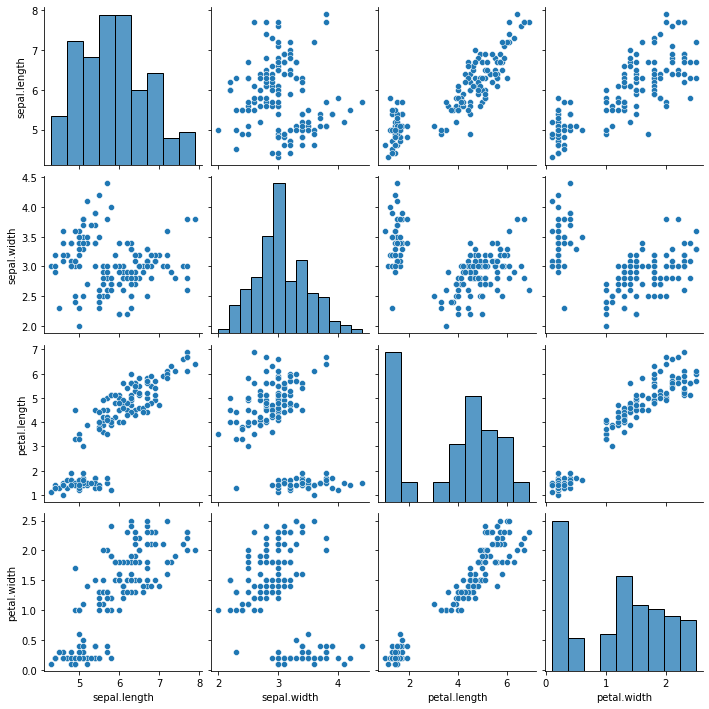

In [25]:
sns.pairplot(iris_df)
plt.show()

### Define the __features__ and the __target__

In [26]:
# X --> Features
X = np.array(iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

# y --> The Target
y = np.array(variety_encoded)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 4)
y shape: (150,)


### Splitting the data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

print('X_train shape:\t', X_train.shape)
print('X_test shape:\t', X_test.shape)

X_train shape:	 (120, 4)
X_test shape:	 (30, 4)


In [28]:
prediction_1 = log_reg.predict([[15.7,2.8,9.5,0.1]])
prediction_2 = log_reg.predict([[1.7,3.8,4.5,11.3]])

print('First prediction:', prediction_1)
print('Second prediction:', prediction_2)

First prediction: [2]
Second prediction: [2]


### Generating the model

In [29]:
log_reg = linear_model.LogisticRegression(n_jobs=-1)
log_reg.fit(X_train, y_train)

score_test_set = round((log_reg.score(X_test, y_test) *100), 2)

print('Score over the test set:', score_test_set, '%')

Score over the test set: 100.0 %


In [30]:
y_pred = log_reg.predict(X_test)

In [31]:
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 11]])

### Utiliza un conjunto de test con el 40% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)
log_reg.fit(X_train, y_train)

print('X_train shape:\t', X_train.shape)
print('X_test shape:\t', X_test.shape)

score_test_set = round((log_reg.score(X_test, y_test) *100), 2)

print('Score over the test set:', score_test_set, '%')

X_train shape:	 (90, 4)
X_test shape:	 (60, 4)
Score over the test set: 95.0 %


In [33]:
prediction_1 = log_reg.predict([[15.7,2.8,9.5,0.1]])
prediction_2 = log_reg.predict([[1.7,3.8,4.5,11.3]])

print('First prediction:', prediction_1)
print('Second prediction:', prediction_2)

First prediction: [2]
Second prediction: [2]


## Elimina la clase "Virginica" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [51]:
new_iris_df = iris_df[iris_df.variety != 'Virginica']
new_iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [52]:
le = preprocessing.LabelEncoder()
variety_encoded_new = le.fit_transform(new_iris_df['variety'])

# 0: Setosa, 1: Versicolor
print('Variety column encoded:\n', variety_encoded_new)

Variety column encoded:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


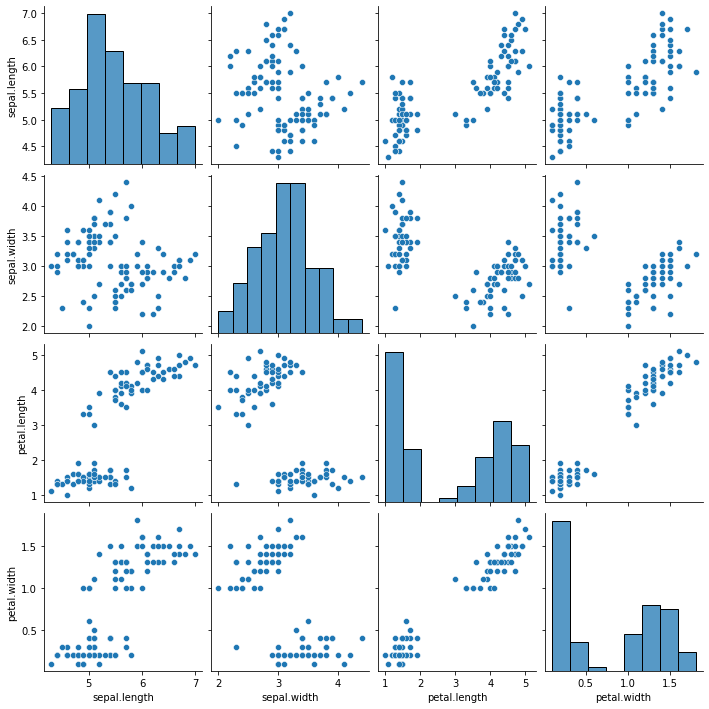

In [53]:
sns.pairplot(new_iris_df)
plt.show()

In [54]:
# X --> Features
X = np.array(new_iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

# y --> The Target
y = np.array(variety_encoded_new)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (100, 4)
y shape: (100,)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

print('X_train shape:\t', X_train.shape)
print('X_test shape:\t', X_test.shape)

X_train shape:	 (80, 4)
X_test shape:	 (20, 4)


In [56]:
prediction_1 = log_reg.predict([[15.7,2.8,9.5,0.1]])
prediction_2 = log_reg.predict([[1.7,3.8,4.5,11.3]])

print('First prediction:', prediction_1)
print('Second prediction:', prediction_2)

First prediction: [2]
Second prediction: [2]


In [57]:
log_reg.fit(X_train, y_train)

score_test_set = round((log_reg.score(X_test, y_test) *100), 2)

print('Score over the test set:', score_test_set, '%')

Score over the test set: 100.0 %


In [58]:
y_pred = log_reg.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[ 9,  0],
       [ 0, 11]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)
log_reg.fit(X_train, y_train)

print('X_train shape:\t', X_train.shape)
print('X_test shape:\t', X_test.shape)

score_test_set = round((log_reg.score(X_test, y_test) *100), 2)

print('Score over the test set:', score_test_set, '%')

X_train shape:	 (60, 4)
X_test shape:	 (40, 4)
Score over the test set: 100.0 %


In [60]:
prediction_1 = log_reg.predict([[15.7,2.8,9.5,0.1]])
prediction_2 = log_reg.predict([[1.7,3.8,4.5,11.3]])

print('First prediction:', prediction_1)
print('Second prediction:', prediction_2)

First prediction: [1]
Second prediction: [1]


¿Consideras la regresión logística un buen algoritmo para estos datos? ¿por qué?

In [61]:
## La regresión logística es un algoritmo de machine learning utilizado para problemas de clasificación y es un modelo predictivo basado en la probabilidad

## A diferencia de la regresión lineal, la regresión logística utiliza una función más compleja (función sigmoide), también conocida como la función logística

## La regresión logística ofrece valores comprendidos entre 0 y 1, a diferencia de la regresión lineal, cuyos resultados pueden exceder 0 y 1

## La regresión logística es comunmente utilizada en la clasificación binaria. 

## Para predecir mayores variables categóricas, es aconsejable utilizar otros modelos

## Algunos ejemplos de sus usos más comunes son.
    # Reconocimiento de caligrafía
    # Detección de spam
    # Segmentación de imágenes y categorización.